## Correlation

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
# Toy dataset with correlated features

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_redundant=7,
    n_classes=2,
    random_state=10,
)

X = pd.DataFrame(X)
y = pd.Series(y)

X.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.283792,0.471010,-1.343721,-0.336990,0.116821,0.145666,-0.054484,-0.343668,-0.226413,-0.240955
1,-0.448534,0.009435,-2.024315,-0.261384,0.219310,0.345767,0.045181,-0.490948,0.409079,-0.667868
2,-2.387431,-0.281900,0.180289,-1.268721,1.183003,1.892637,0.299812,-2.589595,2.523974,-3.684599
3,-0.479035,0.761899,1.095608,-0.556597,0.198756,0.251093,-0.086045,-0.577749,-0.347582,-0.419675
4,1.119764,-0.803058,-0.083495,0.940198,-0.510735,-0.740669,0.026449,1.281034,-0.207904,1.362914


In [3]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

X_train.shape, X_test.shape

((700, 10), (300, 10))

## Correlation heatmap

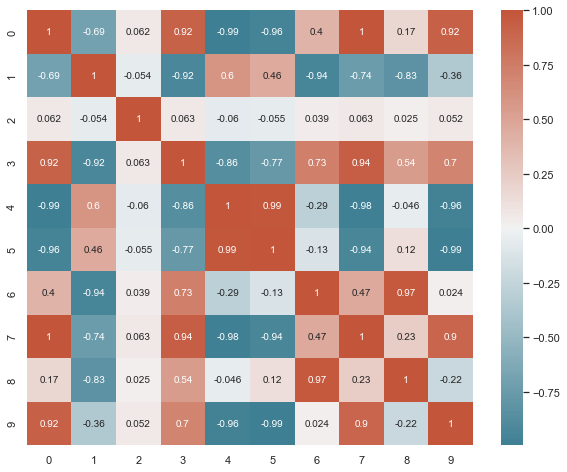

In [4]:
# the default correlation method of pandas.corr is pearson
corrmat = X_train.corr(method='pearson')

# To modify image size
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

# customized color map
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# we can make a heatmap with seaborn
sns.heatmap(corrmat, cmap=cmap, annot=True)
plt.show()

In the plot above, the dark orange squares correspond to highly correlated features (>0.8). Darker blue squares corresponds to negatively correlated features (<-0.8). The diagonal represents the correlation of a feature with itself, therefore the value is 1.

We can see that there are a few features that are highly correlated.

## Correlation scatterplots

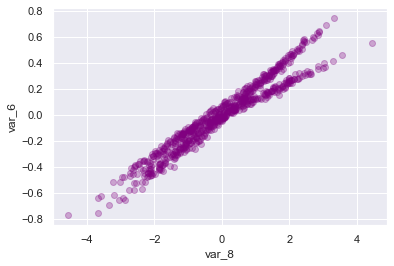

In [5]:
# let's plot a few of the correlated variables

plt.scatter(X_train[8], X_train[6], alpha=0.3, color='purple')
plt.xlabel('var_8')
plt.ylabel('var_6')
plt.show()

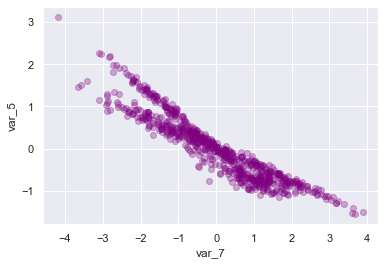

In [6]:
# now, let's plot the variables

plt.scatter(X_train[7], X_train[5], alpha=0.3, color='purple')
plt.xlabel('var_7')
plt.ylabel('var_5')
plt.show()